<a href="https://colab.research.google.com/github/NNaveenKV2348535/NNaveenKV2348535/blob/main/2348535_ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing the libraries**

In [5]:
import pandas as pd # importing pandas
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing the plotting or the data visualisation
import numpy as np
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **2. Importing the dataset**

In [6]:
# Load the dataset
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')
df


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  **3.Data PreProcessing**

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# returns description of the data
df.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

#  **4. Apriori Algorithm**

In [7]:
# replace all the nan values with '' and inplace=True to commit the changes into the dataframe
df.fillna('',axis=1,inplace=True)
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
1,chutney,,,,,,,,,,,,,,,,,,,
2,turkey,avocado,,,,,,,,,,,,,,,,,,
3,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
4,low fat yogurt,,,,,,,,,,,,,,,,,,,


In [8]:
# convert the dataframe into a list of list where each inner list represents a transaction.

df_list = df.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)) :
    item = list()
    for j in df_list[i] :
        if pd.notna(j):
            item.append(j)
    dataset.append(item)

In [9]:
# Create an instace of our TransactionEncoder cabslass
te = TransactionEncoder()
# Fit and transform our dataset which is a list of lists into an array of True and False.
te_array = te.fit(dataset).transform(dataset)
te_array

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False]])

In [10]:
# Convert this into a dataframe for better visualisation and for applying association rules onto the dataframe.

final_df = pd.DataFrame(te_array,columns=te.columns_)
# remove the first column as it does not contain any infomation
final_df.drop(columns=[''],axis=1,inplace=True)
final_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Use the apriori algorithm and the min_support for finding out items or group of items which have a support greater than the minimum support.

frequent_itemsets_ap = apriori(final_df, min_support=0.01, use_colnames=True)
frequent_itemsets_ap

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
254,0.011067,"(milk, ground beef, mineral water)"
255,0.017067,"(spaghetti, ground beef, mineral water)"
256,0.015733,"(spaghetti, milk, mineral water)"
257,0.010267,"(spaghetti, olive oil, mineral water)"


In [12]:
# we have used the metric as confidence and min_threshold to filter out the rules based on these parameters.
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.2)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
2,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,0.007095,1.108813,0.353289
3,(burgers),(green tea),0.087200,0.132000,0.017467,0.200306,1.517468,0.005956,1.085415,0.373584
4,(burgers),(milk),0.087200,0.129600,0.017867,0.204893,1.580964,0.006566,1.094695,0.402580
...,...,...,...,...,...,...,...,...,...,...
157,"(milk, mineral water)",(spaghetti),0.048000,0.174133,0.015733,0.327778,1.882338,0.007375,1.228562,0.492380
158,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138,0.478747
159,"(olive oil, mineral water)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,0.005484,1.318826,0.549222
160,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744,0.488682


In [13]:
# Convert the rules obtained into a dataframe for better visualisation
result = pd.DataFrame(rules_ap)
result.sort_values(by='lift',inplace=True,ascending=False)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
75,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
153,"(spaghetti, mineral water)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,0.011197,1.262427,0.697745
69,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,0.009613,1.183913,0.639564
67,(shrimp),(frozen vegetables),0.071333,0.095333,0.016667,0.233645,2.450820,0.009866,1.180480,0.637444
144,"(milk, mineral water)",(frozen vegetables),0.048000,0.095333,0.011067,0.230556,2.418415,0.006491,1.175740,0.616078
...,...,...,...,...,...,...,...,...,...,...
74,(green tea),(spaghetti),0.132000,0.174133,0.026533,0.201010,1.154346,0.003548,1.033638,0.154042
46,(ground beef),(eggs),0.098267,0.179733,0.020000,0.203528,1.132388,0.002338,1.029875,0.129651
19,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681,0.135005
73,(green tea),(mineral water),0.132000,0.238267,0.030933,0.234343,0.983534,-0.000518,0.994876,-0.018922


In [ ]:
best_choices = result.sort_values(by = 'lift', ascending = False)
print('The best choices would be')
print(best_choices[['antecedents', 'consequents','lift']])

The best choices would be
                    antecedents          consequents      lift
75              (herb & pepper)        (ground beef)  3.291555
153  (mineral water, spaghetti)        (ground beef)  2.907540
69                   (tomatoes)  (frozen vegetables)  2.474134
67                     (shrimp)  (frozen vegetables)  2.450820
144       (mineral water, milk)  (frozen vegetables)  2.418415
..                          ...                  ...       ...
74                  (green tea)          (spaghetti)  1.154346
46                (ground beef)               (eggs)  1.132388
19                  (chocolate)               (eggs)  1.127246
73                  (green tea)      (mineral water)  0.983534
57                   (escalope)      (mineral water)  0.902879

[162 rows x 3 columns]


In [ ]:
worst_choices = result.sort_values(by = 'lift', ascending = True)
print('The worst choices would be')
print(worst_choices[['antecedents', 'consequents','lift']])

The worst choices would be
                    antecedents          consequents      lift
57                   (escalope)      (mineral water)  0.902879
73                  (green tea)      (mineral water)  0.983534
19                  (chocolate)               (eggs)  1.127246
46                (ground beef)               (eggs)  1.132388
74                  (green tea)          (spaghetti)  1.154346
..                          ...                  ...       ...
144       (mineral water, milk)  (frozen vegetables)  2.418415
67                     (shrimp)  (frozen vegetables)  2.450820
69                   (tomatoes)  (frozen vegetables)  2.474134
153  (mineral water, spaghetti)        (ground beef)  2.907540
75              (herb & pepper)        (ground beef)  3.291555

[162 rows x 3 columns]


# **5. Bar Chart**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


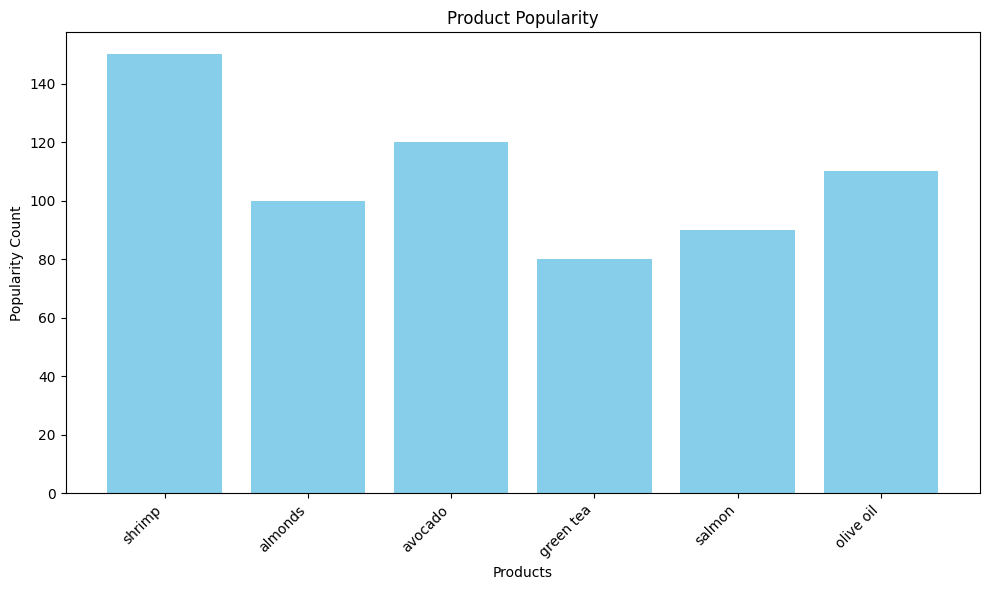

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for product popularity
product_popularity = {
    "shrimp": 150,
    "almonds": 100,
    "avocado": 120,
    "green tea": 80,
    "salmon": 90,
    "olive oil": 110,
    # ... (other products and their popularity counts)
}

# Create a bar chart for product popularity
plt.figure(figsize=(10, 6))
plt.bar(product_popularity.keys(), product_popularity.values(), color='skyblue')
plt.title("Product Popularity")
plt.xlabel("Products")
plt.ylabel("Popularity Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **6. Heatmap - Association Rules Strength**

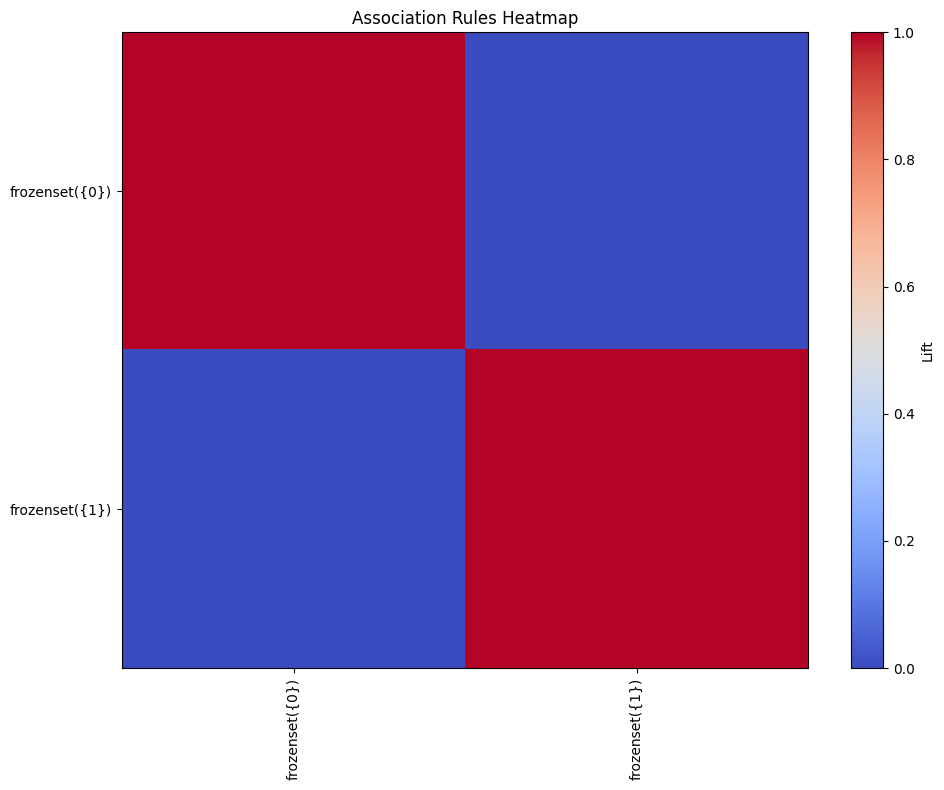

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the association rules dataframe (replace association_rules_df with your dataframe)
# association_rules_df = ... (Use the code from the previous response to create the dataframe)

# Create a pivot table to prepare data for the heatmap
pivot_table = rules_ap.pivot_table(index='antecedents', columns='consequents', values='lift', fill_value=0)

# Convert pivot table to a numpy array
heatmap_data = pivot_table.to_numpy()

# Get the item names for rows and columns
items = pivot_table.index.tolist()
# Create the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(np.arange(len(items)), items, rotation=90)
plt.yticks(np.arange(len(items)), items)
plt.title('Association Rules Heatmap')
plt.tight_layout()
plt.show()


# **7. Store Layout Optimization Visualization**

<ipython-input-81-916eedf7b709>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


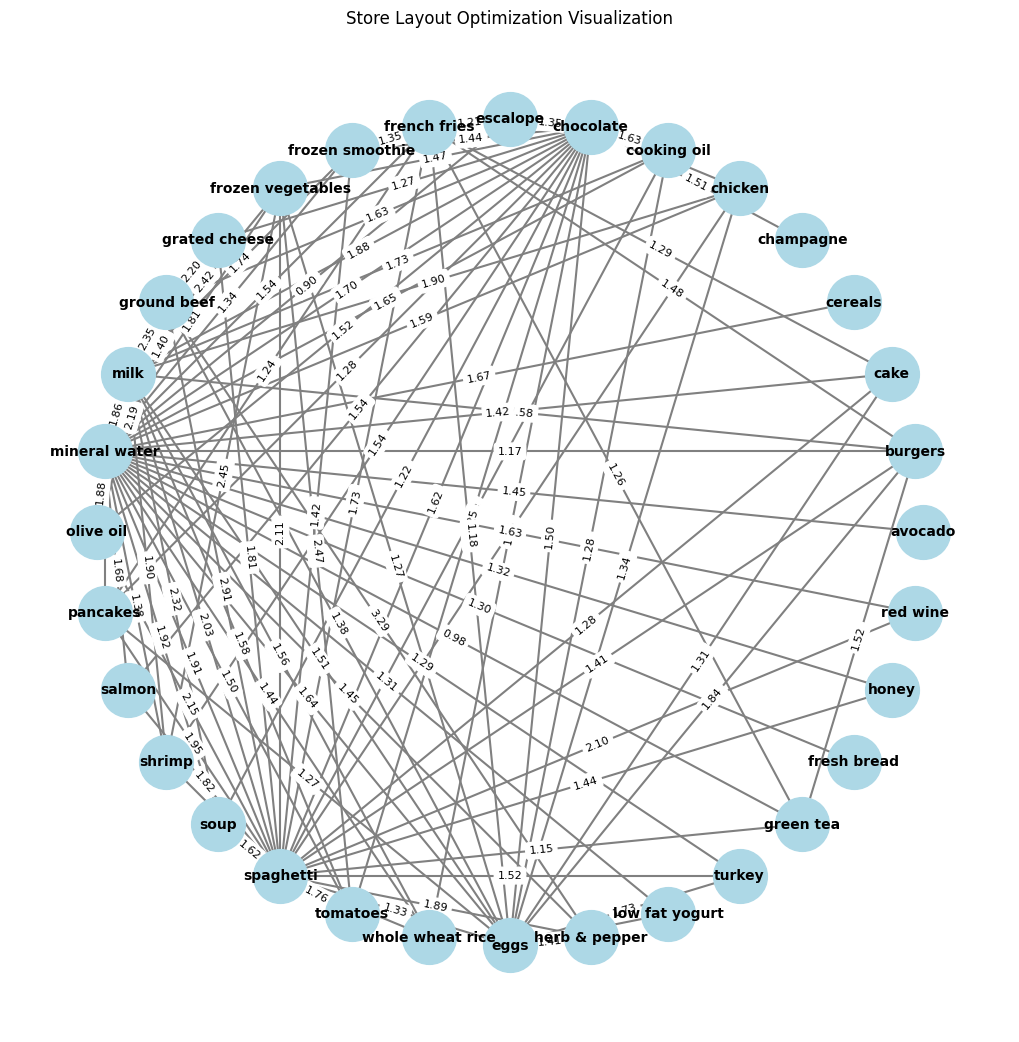

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Create a network graph
G = nx.Graph()

# Add nodes (items)
for antecedents in rules_ap['antecedents']:
    for item in antecedents:
        G.add_node(item)

# Add edges (associations)
for index, row in rules_ap.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    lift = row['lift']

    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=lift)

# Define node positions for a circular layout
pos = nx.circular_layout(G)

# Draw the network graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_size=10, font_weight='bold', node_size=1500, node_color='lightblue', edge_color='gray', width=1.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}, font_size=8)
plt.title("Store Layout Optimization Visualization")
plt.tight_layout()
plt.show()


In [ ]:
# Sample purchase history
purchase_history = [
    ["shrimp", "almonds", "avocado"],
    ["green tea", "salmon", "olive oil"],
    ["low-fat yogurt", "green tea", "honey"]
]

# Sample item associations
item_associations = {
    "shrimp": ["mineral water", "frozen smoothie", "spinach"],
    "almonds": ["mineral water", "frozen smoothie", "spinach"],
    "avocado": ["mineral water", "frozen smoothie", "spinach"],
    "green tea": ["mineral water", "frozen smoothie", "spinach"],
    "salmon": ["mineral water", "frozen smoothie", "spinach"],
    "olive oil": ["mineral water", "frozen smoothie", "spinach"],
    "low-fat yogurt": ["salmon", "olive oil", "frozen smoothie"],
    "honey": ["mineral water", "frozen smoothie", "spinach"]
}

# 1. Frequently Bought Together Recommendations
last_purchase = purchase_history[-1]
fbt_recommendations = set()
for item in last_purchase:
    fbt_recommendations.update(item_associations.get(item, []))
print("Frequently Bought Together Recommendations:", fbt_recommendations)

# 2. User-Based Collaborative Filtering
similar_customers = ["green tea", "salmon", "olive oil"]
ubcf_recommendations = set()
for customer in similar_customers:
    ubcf_recommendations.update(item_associations.get(customer, []))
print("User-Based Collaborative Filtering Recommendations:", ubcf_recommendations)

# 3. Item-Based Collaborative Filtering
last_purchase = purchase_history[-1]
ibcf_recommendations = set()
for item in last_purchase:
    ibcf_recommendations.update(item_associations.get(item, []))
print("Item-Based Collaborative Filtering Recommendations:", ibcf_recommendations)

# 4. Content-Based Recommendations
last_purchase = purchase_history[0]  # Use the first purchase for content-based recommendations
cb_recommendations = set()
for item in last_purchase:
    cb_recommendations.update(item_associations.get(item, []))
print("Content-Based Recommendations:", cb_recommendations)


Frequently Bought Together Recommendations: {'salmon', 'frozen smoothie', 'spinach', 'mineral water', 'olive oil'}
User-Based Collaborative Filtering Recommendations: {'mineral water', 'spinach', 'frozen smoothie'}
Item-Based Collaborative Filtering Recommendations: {'salmon', 'frozen smoothie', 'spinach', 'mineral water', 'olive oil'}
Content-Based Recommendations: {'mineral water', 'spinach', 'frozen smoothie'}


# **8.Cross-Selling Strategy Matrix**

In [14]:
# Define thresholds for metrics
support_threshold = 0.1
confidence_threshold = 0.6
lift_threshold = 1.2

# Create a new column to store priority levels
rules_ap['priority'] = 'Low'

# Update priority levels based on thresholds
high_priority_mask = (rules_ap['support'] >= support_threshold) & \
                     (rules_ap['confidence'] >= confidence_threshold) & \
                     (rules_ap['lift'] >= lift_threshold)
medium_priority_mask = (rules_ap['support'] >= support_threshold) | \
                       (rules_ap['confidence'] >= confidence_threshold) | \
                       (rules_ap['lift'] >= lift_threshold)
rules_ap.loc[high_priority_mask, 'priority'] = 'High'
rules_ap.loc[medium_priority_mask & ~high_priority_mask, 'priority'] = 'Medium'

# Print the updated dataframe with priority levels
print(rules_ap[['antecedents', 'consequents', 'priority']])

                    antecedents      consequents priority
0                     (avocado)  (mineral water)   Medium
1                     (burgers)           (eggs)   Medium
2                     (burgers)   (french fries)   Medium
3                     (burgers)      (green tea)   Medium
4                     (burgers)           (milk)   Medium
..                          ...              ...      ...
157       (milk, mineral water)      (spaghetti)   Medium
158      (olive oil, spaghetti)  (mineral water)   Medium
159  (olive oil, mineral water)      (spaghetti)   Medium
160       (spaghetti, pancakes)  (mineral water)   Medium
161   (pancakes, mineral water)      (spaghetti)   Medium

[162 rows x 3 columns]
